In [1]:
import pandas as pd
import os
dir_name="/content/drive/MyDrive/combined_data/"
user = 'user01'
date = '2020-09-07'

In [9]:
dir = os.listdir("/content/drive/MyDrive/combined_data")

In [10]:
for file in dir:
  df = pd.read_csv("/content/drive/MyDrive/combined_data/"+file)
  user = file.split('_')[0]
  date = file.split('_')[1].split('.')[0]

  # Sort by timestamp
  df = df.sort_values('timestamp')
  df['date_time'] = pd.to_datetime(df['date_time'])

  # Identify changes in activities
  df['prev_activity'] = df['action'].shift(1)
  df['activity_change'] = (df['action'] != df['prev_activity'])

  # Create a group identifier for continuous activities
  df['group'] = df['activity_change'].cumsum()

  # Calculate the start and end times for each group
  grouped = df.groupby(['group', 'action']).agg(
      start_time=('date_time', 'first'),
      end_time=('date_time', 'last')
  ).reset_index()

  # Calculate the duration for each group
  grouped['duration'] = grouped['end_time'] - grouped['start_time']
  #grouped['duration'] = grouped['duration'].apply(lambda x: str(x).split('.')[0])
  #grouped['duration'] = grouped['duration'].apply(lambda x: str(x).split(' ')[-1])

  # Drop the group column as it's no longer needed
  grouped = grouped.drop(columns=['group'])

  grouped['user'] = user
  grouped['date'] = date
  grouped['duration'] = grouped['duration'].apply(lambda x: x.total_seconds()/60)
  grouped['start_time'] = grouped['start_time'].dt.time
  grouped['end_time'] = grouped['end_time'].dt.time

  grouped.to_csv("/content/drive/MyDrive/Timelines/"+file,index=False)

In [11]:
grouped


,action,start_time,end_time,duration,user,date
0,recreation_media,11:50:00,14:04:00,134.0,user25,2020-09-27
1,travel,14:05:00,14:24:00,19.0,user25,2020-09-27
2,meal,14:25:00,15:33:00,68.0,user25,2020-09-27
3,travel,15:34:00,15:39:00,5.0,user25,2020-09-27
4,household,15:40:00,16:59:00,79.0,user25,2020-09-27
5,work,17:00:00,18:00:00,60.0,user25,2020-09-27
6,recreation_media,18:01:00,18:14:00,13.0,user25,2020-09-27
7,work,18:15:00,20:02:00,107.0,user25,2020-09-27
8,meal,20:03:00,20:29:00,26.0,user25,2020-09-27
9,work,20:30:00,23:09:00,159.0,user25,2020-09-27


In [12]:
grouped.dtypes

action         object
start_time     object
end_time       object
duration      float64
user           object
date           object
dtype: object

In [14]:
dir = os.listdir( "/content/drive/MyDrive/Timelines" )
df_list = []

for file in dir:
   df = pd.read_csv("/content/drive/MyDrive/Timelines/"+file)
   df_list.append(df)

df_csv_append = pd.concat(df_list, ignore_index=True)
df_csv_append['action'] = df_csv_append['action'].replace('care_housemem','household')
df_csv_append['action'] = df_csv_append['action'].replace('shop','household')
df_csv_append['action'] = df_csv_append['action'].replace('recreation_media','recreation')
df_csv_append['action'] = df_csv_append['action'].replace('entertainment','recreation')
df_csv_append['action'] = df_csv_append['action'].replace('recreation_etc','recreation')
df_csv_append['action'] = df_csv_append['action'].replace('hobby','personal_care')
df_csv_append['action'] = df_csv_append['action'].replace('community_interaction','socialising')
df_csv_append.to_csv("/content/drive/MyDrive/allTimelines.csv",index=False)

In [15]:
df_csv_append

,action,start_time,end_time,duration,user,date
0,household,09:11:00.004000,09:29:58.992000,18.983133,user01,2020-08-31
1,travel,09:50:00.062000,10:29:29.669000,39.493450,user01,2020-08-31
2,personal_care,10:29:30.739000,10:39:29.511000,9.979533,user01,2020-08-31
3,household,11:08:17.875000,12:21:07.576000,72.828350,user01,2020-08-31
4,travel,12:34:07.810000,12:59:29.396000,25.359767,user01,2020-08-31
...,...,...,...,...,...,...
7283,recreation,20:00:00,20:59:00,59.000000,user21,2020-09-16
7284,outdoor_act,21:00:00,21:44:00,44.000000,user21,2020-09-16
7285,personal_care,21:45:00,22:14:00,29.000000,user21,2020-09-16
7286,household,20:34:00,20:34:00,0.000000,user21,2020-09-20


In [36]:
df_csv_append = pd.read_csv("/content/drive/MyDrive/allTimelines.csv")

In [37]:
df_csv_append['start_time'] = pd.to_datetime(df_csv_append['start_time'])
df_csv_append['end_time'] = pd.to_datetime(df_csv_append['end_time'])

df_csv_append = df_csv_append.sort_values(by=['user', 'date', 'start_time'])
# Group by user and date
grouped = df_csv_append.groupby(['user', 'date'])

# Get the last 3 activities for each user each day
last_3_activities = grouped.tail(3)

# Calculate duration of each activity
last_3_activities['duration'] = (last_3_activities['end_time'] - last_3_activities['start_time']).dt.total_seconds() / 60

# Display the result
print(last_3_activities)

<ipython-input-37-0d9a706bf669>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_csv_append['start_time'] = pd.to_datetime(df_csv_append['start_time'])
<ipython-input-37-0d9a706bf669>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_csv_append['end_time'] = pd.to_datetime(df_csv_append['end_time'])


           action          start_time            end_time    duration    user  \
5796  outdoor_act 2024-07-14 19:50:00 2024-07-14 20:39:00   49.000000  user01   
5797       travel 2024-07-14 21:00:00 2024-07-14 21:59:00   59.000000  user01   
5798         meal 2024-07-14 22:30:00 2024-07-14 22:59:00   29.000000  user01   
8            work 2024-07-14 16:59:30 2024-07-14 20:59:29  239.983333  user01   
9          travel 2024-07-14 20:59:30 2024-07-14 21:29:29   29.983333  user01   
...           ...                 ...                 ...         ...     ...   
1683         meal 2024-07-14 20:59:30 2024-07-14 21:29:29   29.983333  user30   
1684   recreation 2024-07-14 21:29:30 2024-07-14 22:06:58   37.466667  user30   
1709   recreation 2024-07-14 17:33:30 2024-07-14 17:59:29   25.983333  user30   
1710         meal 2024-07-14 17:59:30 2024-07-14 18:59:29   59.983333  user30   
1711   recreation 2024-07-14 18:59:30 2024-07-14 22:49:59  230.483333  user30   

            date  
5796  20

<ipython-input-37-0d9a706bf669>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_3_activities['duration'] = (last_3_activities['end_time'] - last_3_activities['start_time']).dt.total_seconds() / 60


In [38]:
pivot_df = last_3_activities.pivot_table(index=['user', 'date'], columns='action', values='duration', aggfunc=['sum'], fill_value=0).reset_index()
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]
pivot_df.rename(columns={'user_':'user','date_':'date'},inplace=True)
pivot_df.columns.name = None
pivot_df = pivot_df.round(2)
pivot_df

,user,date,sum_household,sum_meal,sum_outdoor_act,sum_personal_care,sum_recreation,sum_sleep,sum_socialising,sum_study,sum_travel,sum_work
0,user01,2020-08-30,0.00,29.00,49.0,0.00,0.00,0.0,0.0,0.00,59.00,0.00
1,user01,2020-08-31,0.00,0.00,0.0,0.00,0.00,0.0,0.0,49.13,29.98,239.98
2,user01,2020-09-05,5.48,0.00,0.0,0.00,0.00,0.0,0.0,0.00,84.98,54.98
3,user01,2020-09-07,53.48,25.88,0.0,0.00,22.48,0.0,0.0,0.00,0.00,0.00
4,user01,2020-09-08,0.00,0.00,0.0,91.90,0.00,0.0,0.0,29.97,52.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
561,user30,2020-09-23,0.00,30.98,0.0,13.97,222.48,0.0,0.0,0.00,0.00,0.00
562,user30,2020-09-24,0.00,35.98,0.0,12.98,113.48,0.0,0.0,0.00,0.00,0.00
563,user30,2020-09-25,0.00,20.98,0.0,17.97,99.48,0.0,0.0,0.00,0.00,0.00
564,user30,2020-09-26,0.00,29.98,0.0,0.00,62.45,0.0,0.0,0.00,0.00,0.00


In [39]:
pivot_df.columns

Index(['user', 'date', 'sum_household', 'sum_meal', 'sum_outdoor_act',
       'sum_personal_care', 'sum_recreation', 'sum_sleep', 'sum_socialising',
       'sum_study', 'sum_travel', 'sum_work'],
      dtype='object')

In [41]:
pivot_df.to_csv("/content/drive/MyDrive/userActionLastDur.csv",index=False)

In [42]:
pivot_df

,user,date,sum_household,sum_meal,sum_outdoor_act,sum_personal_care,sum_recreation,sum_sleep,sum_socialising,sum_study,sum_travel,sum_work
0,user01,2020-08-30,0.00,29.00,49.0,0.00,0.00,0.0,0.0,0.00,59.00,0.00
1,user01,2020-08-31,0.00,0.00,0.0,0.00,0.00,0.0,0.0,49.13,29.98,239.98
2,user01,2020-09-05,5.48,0.00,0.0,0.00,0.00,0.0,0.0,0.00,84.98,54.98
3,user01,2020-09-07,53.48,25.88,0.0,0.00,22.48,0.0,0.0,0.00,0.00,0.00
4,user01,2020-09-08,0.00,0.00,0.0,91.90,0.00,0.0,0.0,29.97,52.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
561,user30,2020-09-23,0.00,30.98,0.0,13.97,222.48,0.0,0.0,0.00,0.00,0.00
562,user30,2020-09-24,0.00,35.98,0.0,12.98,113.48,0.0,0.0,0.00,0.00,0.00
563,user30,2020-09-25,0.00,20.98,0.0,17.97,99.48,0.0,0.0,0.00,0.00,0.00
564,user30,2020-09-26,0.00,29.98,0.0,0.00,62.45,0.0,0.0,0.00,0.00,0.00


In [43]:
#pivot_df = pd.read_csv("/content/drive/MyDrive/userActionDurations.csv")
survey = pd.read_csv("/content/drive/MyDrive/user_survey_2020.csv")
survey.dtypes

userId           object
date             object
amPm             object
startInput       object
endInput         object
sleep           float64
sleepProblem    float64
dream           float64
amCondition     float64
amEmotion       float64
pmEmotion       float64
pmStress        float64
pmFatigue       float64
caffeine         object
cAmount(ml)     float64
alcohol          object
aAmount(ml)     float64
dtype: object

In [44]:
survey.rename(columns={'userId':'user'},inplace=True)

In [45]:
survey['date'] = pd.to_datetime(survey['date'])

# Step 2: Format the 'date' column to the desired format
survey['date'] = survey['date'].dt.strftime('%Y-%m-%d')

survey

<ipython-input-45-8d6da19953d1>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  survey['date'] = pd.to_datetime(survey['date'])


,user,date,amPm,startInput,endInput,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,pmStress,pmFatigue,caffeine,cAmount(ml),alcohol,aAmount(ml)
0,user01,2020-08-30,am,30-08-2020 12:59,30-08-2020 13:00,5.0,4.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,user01,2020-08-30,pm,30-08-2020 23:24,30-08-2020 23:24,NaN,NaN,NaN,NaN,NaN,4.0,2.0,4.0,NaN,NaN,NaN,NaN
2,user01,2020-08-31,am,31-08-2020 08:43,31-08-2020 08:43,3.0,6.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,user01,2020-08-31,pm,31-08-2020 22:48,31-08-2020 22:49,NaN,NaN,NaN,NaN,NaN,4.0,3.0,2.0,coffee,250.0,NaN,NaN
4,user01,2020-09-01,am,01-09-2020 10:17,01-09-2020 10:18,2.0,3.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,user30,2020-09-25,pm,25-09-2020 21:09,25-09-2020 21:09,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN
1226,user30,2020-09-26,am,26-09-2020 09:37,26-09-2020 09:38,3.0,0.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1227,user30,2020-09-26,pm,26-09-2020 21:07,26-09-2020 21:07,NaN,NaN,NaN,NaN,NaN,3.0,4.0,5.0,NaN,NaN,NaN,NaN
1228,user30,2020-09-27,am,27-09-2020 09:27,27-09-2020 09:28,3.0,0.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
survey = survey[['user', 'date', 'pmStress','pmEmotion']]

In [47]:
survey['stress'] = survey['pmStress']+survey['pmEmotion']

<ipython-input-47-aabdbb85b038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['stress'] = survey['pmStress']+survey['pmEmotion']


In [48]:
survey = survey.dropna()

In [49]:
survey

,user,date,pmStress,pmEmotion,stress
1,user01,2020-08-30,2.0,4.0,6.0
3,user01,2020-08-31,3.0,4.0,7.0
5,user01,2020-09-01,3.0,4.0,7.0
7,user01,2020-09-02,3.0,4.0,7.0
9,user01,2020-09-03,2.0,2.0,4.0
...,...,...,...,...,...
1221,user30,2020-09-23,3.0,3.0,6.0
1223,user30,2020-09-24,3.0,3.0,6.0
1225,user30,2020-09-25,3.0,3.0,6.0
1227,user30,2020-09-26,4.0,3.0,7.0


In [50]:
survey['stress'].value_counts()

stress
6.0     155
8.0     109
5.0     107
7.0      94
9.0      60
4.0      33
10.0     32
3.0      16
2.0       9
Name: count, dtype: int64

In [51]:
merged_df = pd.merge(pivot_df, survey[['user', 'date', 'stress']], on=['user', 'date'], how='left')
merged_df

,user,date,sum_household,sum_meal,sum_outdoor_act,sum_personal_care,sum_recreation,sum_sleep,sum_socialising,sum_study,sum_travel,sum_work,stress
0,user01,2020-08-30,0.00,29.00,49.0,0.00,0.00,0.0,0.0,0.00,59.00,0.00,6.0
1,user01,2020-08-31,0.00,0.00,0.0,0.00,0.00,0.0,0.0,49.13,29.98,239.98,7.0
2,user01,2020-09-05,5.48,0.00,0.0,0.00,0.00,0.0,0.0,0.00,84.98,54.98,8.0
3,user01,2020-09-07,53.48,25.88,0.0,0.00,22.48,0.0,0.0,0.00,0.00,0.00,8.0
4,user01,2020-09-08,0.00,0.00,0.0,91.90,0.00,0.0,0.0,29.97,52.40,0.00,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,user30,2020-09-23,0.00,30.98,0.0,13.97,222.48,0.0,0.0,0.00,0.00,0.00,6.0
562,user30,2020-09-24,0.00,35.98,0.0,12.98,113.48,0.0,0.0,0.00,0.00,0.00,6.0
563,user30,2020-09-25,0.00,20.98,0.0,17.97,99.48,0.0,0.0,0.00,0.00,0.00,6.0
564,user30,2020-09-26,0.00,29.98,0.0,0.00,62.45,0.0,0.0,0.00,0.00,0.00,7.0


In [52]:
merged_df['stress'].fillna(2.0,inplace=True)

In [53]:
merged_df['stress'].value_counts()

stress
6.0     140
5.0     101
8.0      99
7.0      86
9.0      56
10.0     32
4.0      26
2.0      13
3.0      13
Name: count, dtype: int64

In [54]:
merged_df.columns

Index(['user', 'date', 'sum_household', 'sum_meal', 'sum_outdoor_act',
       'sum_personal_care', 'sum_recreation', 'sum_sleep', 'sum_socialising',
       'sum_study', 'sum_travel', 'sum_work', 'stress'],
      dtype='object')

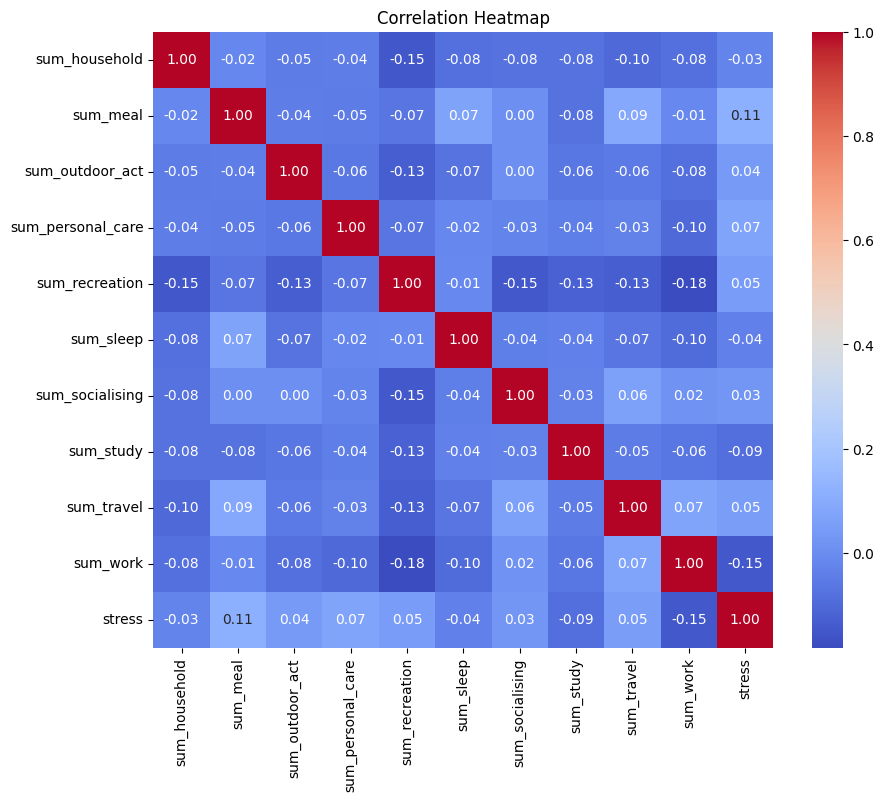

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = merged_df.iloc[:, 2:].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


In [56]:
merged_df.to_csv("/content/drive/MyDrive/finalLastActDataset.csv",index=False)

In [ ]:
merged_df = pd.read_csv("/content/drive/MyDrive/finalDataset.csv")

In [ ]:
pip install ctgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2

In [ ]:
from ctgan import CTGAN
discrete_columns = merged_df.columns

# Display the first few rows of the dataframe
print("Original Data:")
print(merged_df.head())
print("\nOriginal Data Shape:")
print(merged_df.shape)

discrete_columns = merged_df.columns

# Create an instance of the CTGAN model
model = CTGAN()

# Fit the model to your data
model.fit(merged_df, discrete_columns)

# Number of new samples to generate
num_new_samples = 237

# Generate new synthetic data
synthetic_data = model.sample(num_new_samples)

# Combine the original data with the synthetic data
augmented_data = pd.concat([merged_df, synthetic_data], ignore_index=True)

# Display the shape of the new dataset
print("\nAugmented Data Shape:")
print(augmented_data.shape)

# Display the first few rows of the augmented data
print("\nAugmented Data:")
print(augmented_data.head())


Original Data:
     user        date  sum_household  sum_meal  sum_outdoor_act  \
0  user01  2020-08-30           0.00     88.00             49.0   
1  user01  2020-08-31          91.81     59.99              0.0   
2  user01  2020-09-05          25.48     69.96              0.0   
3  user01  2020-09-07          53.48    130.83              0.0   
4  user01  2020-09-08          68.48      0.00              0.0   

   sum_personal_care  sum_recreation  sum_sleep  sum_socialising  sum_study  \
0               0.00           51.00        0.0             0.00       0.00   
1               9.98          119.97        0.0             0.00      49.13   
2              99.95           29.98        0.0            49.98      26.48   
3              59.97           82.45        0.0            14.99      89.97   
4             278.15          109.92        0.0             0.00     129.95   

   sum_travel  sum_work  pmStress  
0      117.00    178.00       2.0  
1      154.82    239.99       3.0  

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass



Augmented Data Shape:
(793, 13)

Augmented Data:
     user        date  sum_household  sum_meal  sum_outdoor_act  \
0  user01  2020-08-30           0.00     88.00             49.0   
1  user01  2020-08-31          91.81     59.99              0.0   
2  user01  2020-09-05          25.48     69.96              0.0   
3  user01  2020-09-07          53.48    130.83              0.0   
4  user01  2020-09-08          68.48      0.00              0.0   

   sum_personal_care  sum_recreation  sum_sleep  sum_socialising  sum_study  \
0               0.00           51.00        0.0             0.00       0.00   
1               9.98          119.97        0.0             0.00      49.13   
2              99.95           29.98        0.0            49.98      26.48   
3              59.97           82.45        0.0            14.99      89.97   
4             278.15          109.92        0.0             0.00     129.95   

   sum_travel  sum_work  pmStress  
0      117.00    178.00       2.0  


In [ ]:
augmented_data.to_csv("/content/drive/MyDrive/finalAugmentedDataset.csv",index=False)

In [ ]:
augmented_data.columns


Index(['user', 'date', 'sum_household', 'sum_meal', 'sum_outdoor_act',
       'sum_personal_care', 'sum_recreation', 'sum_sleep', 'sum_socialising',
       'sum_study', 'sum_travel', 'sum_work', 'pmStress'],
      dtype='object')